In [3]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data_dir = 'data'

In [4]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 364 files belonging to 2 classes.


In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [6]:
batch_size = 32
image_size = (128, 128)

In [11]:
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  
    subset='training'
)

valid_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 292 images belonging to 2 classes.
Found 72 images belonging to 2 classes.


In [12]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # 1 neuron for binary classification
])

In [13]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=10
)

Epoch 1/10
10/10 [==============================] - 15s 1s/step - loss: 1.0046 - accuracy: 0.5137 - val_loss: 0.6287 - val_accuracy: 0.8056
Epoch 2/10
10/10 [==============================] - 8s 756ms/step - loss: 0.5491 - accuracy: 0.7774 - val_loss: 0.3405 - val_accuracy: 0.8611
Epoch 3/10
10/10 [==============================] - 8s 731ms/step - loss: 0.3433 - accuracy: 0.8527 - val_loss: 0.1806 - val_accuracy: 0.9306
Epoch 4/10
10/10 [==============================] - 7s 704ms/step - loss: 0.2260 - accuracy: 0.9041 - val_loss: 0.2228 - val_accuracy: 0.9028
Epoch 5/10
10/10 [==============================] - 7s 727ms/step - loss: 0.2103 - accuracy: 0.9281 - val_loss: 0.1355 - val_accuracy: 0.9722
Epoch 6/10
10/10 [==============================] - 7s 789ms/step - loss: 0.1284 - accuracy: 0.9521 - val_loss: 0.0977 - val_accuracy: 0.9861
Epoch 7/10
10/10 [==============================] - 7s 735ms/step - loss: 0.0797 - accuracy: 0.9692 - val_loss: 0.1304 - val_accuracy: 0.9583
Epoch 8/

1/1 [==============================] - 0s 38ms/step


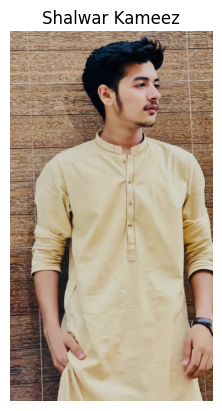

In [24]:
import matplotlib.image as mpimg
test_image_path = 'test/wasam.png'
test_image = tf.keras.utils.load_img(test_image_path, target_size=(128, 128))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = test_image.reshape(1, 128, 128, 3)
predictions = model.predict(test_image)
img = mpimg.imread(test_image_path)
plt.imshow(img)
plt.axis('off')  
plt.title("Shalwar Kameez" if predictions[0] > 0.5 else "Ajrak") 
plt.show()